<a href="https://colab.research.google.com/github/bigirimanainnocent12/Code/blob/main/Methode_de_lissage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

df = pd.read_excel("/content/F10_01062017_1709_VRB e2_Chardo PR 16_T200_NV_SYNC.xlsx")
display(df.head())

,Temps,TｰC,Csg T,Poids,Volume,CO2,FinPhas,Vinst,Csg V,V11,V5,Acc G,Tps inject.
0,0.00,20.0,20,1849.50,1.1,0.000,inf,0.000,inf,0.000,0.000,0.000,0
1,0.33,20.0,20,1849.50,1.1,0.000,inf,0.000,inf,0.000,0.000,0.000,0
2,0.67,20.0,20,1849.48,1.1,0.018,inf,0.055,inf,-0.027,-0.027,0.041,0
3,1.00,20.0,20,1849.48,1.1,0.018,inf,0.000,inf,0.022,0.022,-0.099,0
4,1.33,20.0,20,1849.46,1.1,0.036,inf,0.055,inf,0.012,0.027,-0.035,0


In [26]:
# prompt: Créer une dataframe suivant une loi uniforme

import pandas as pd
import numpy as np

df["lisser"] = df['V11'].rolling(window=8).mean()

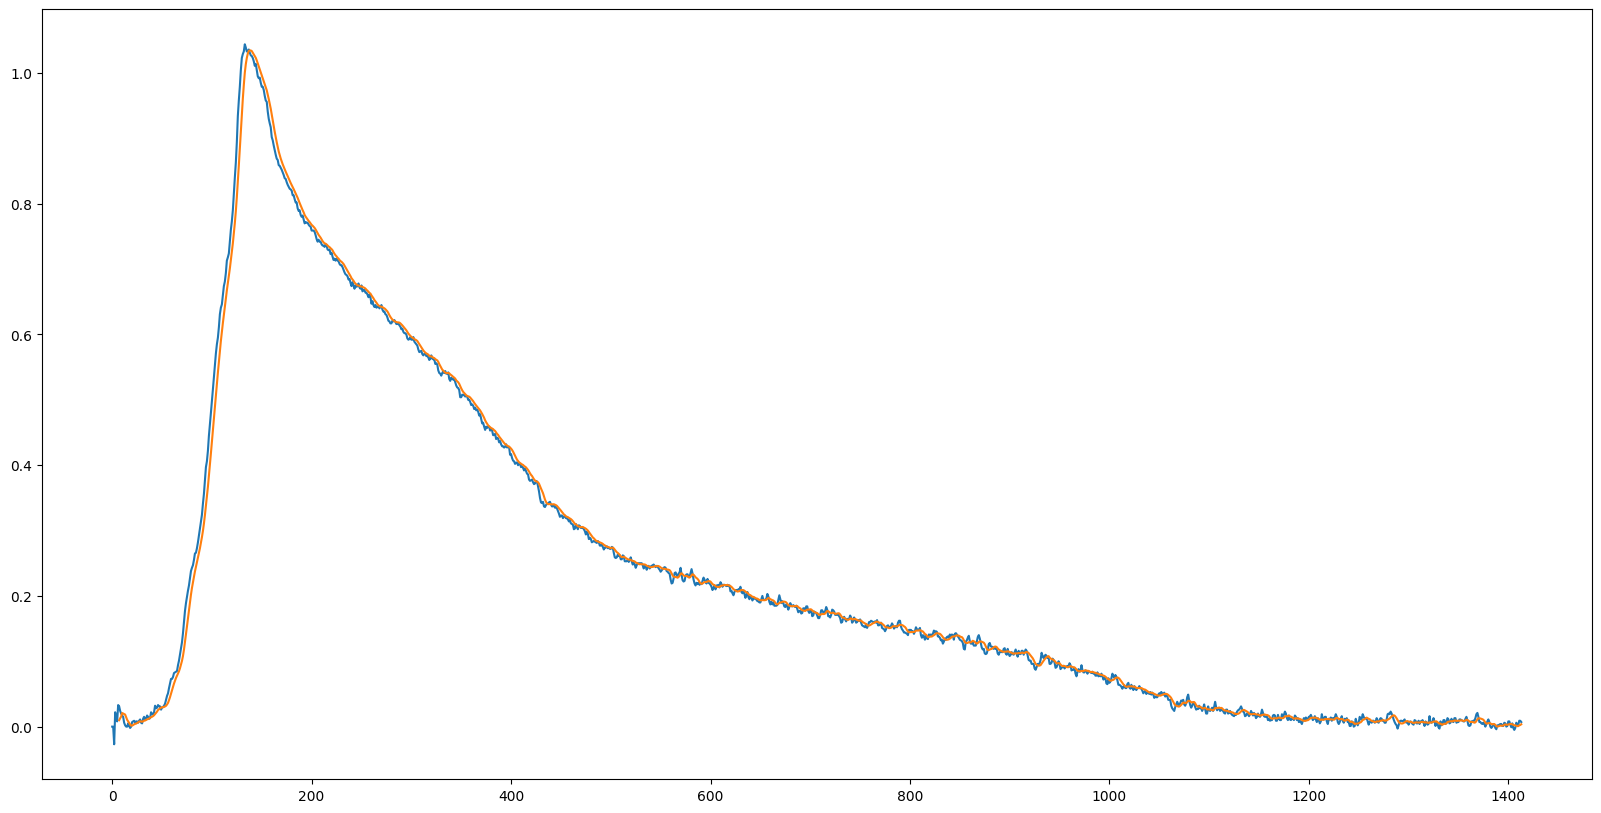

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['lisser'])
plt.show()

# **Interpolation avec Splines**

Les splines peuvent être utilisées pour créer une courbe lisse à travers les points de données sans perdre d'observations.

In [15]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

# Créer une série de données
data = df['V11']
x = np.arange(len(data))

# Appliquer les splines
spline = UnivariateSpline(x, data, s=2)
df["spline"] = spline(x)

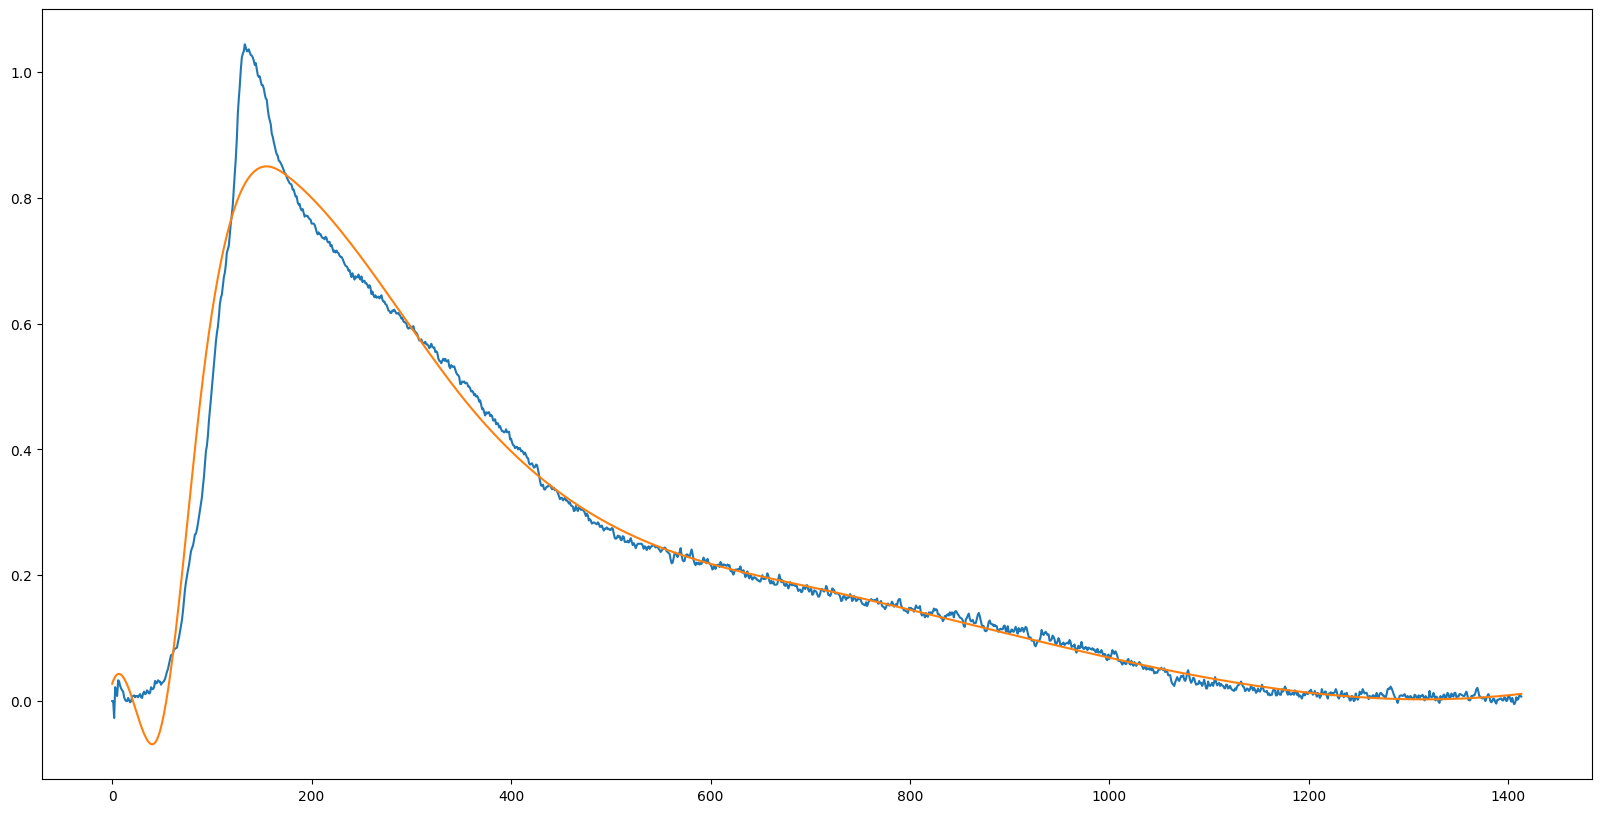

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['spline'])
plt.show()

# **Lissage Exponentiel :**

- Utilise la méthode ewm de pandas pour appliquer un lissage exponentiel.
- Le paramètre span contrôle la fenêtre de lissage.

In [21]:
df["expo"] =df['V11'].ewm(span=12, adjust=False).mean()

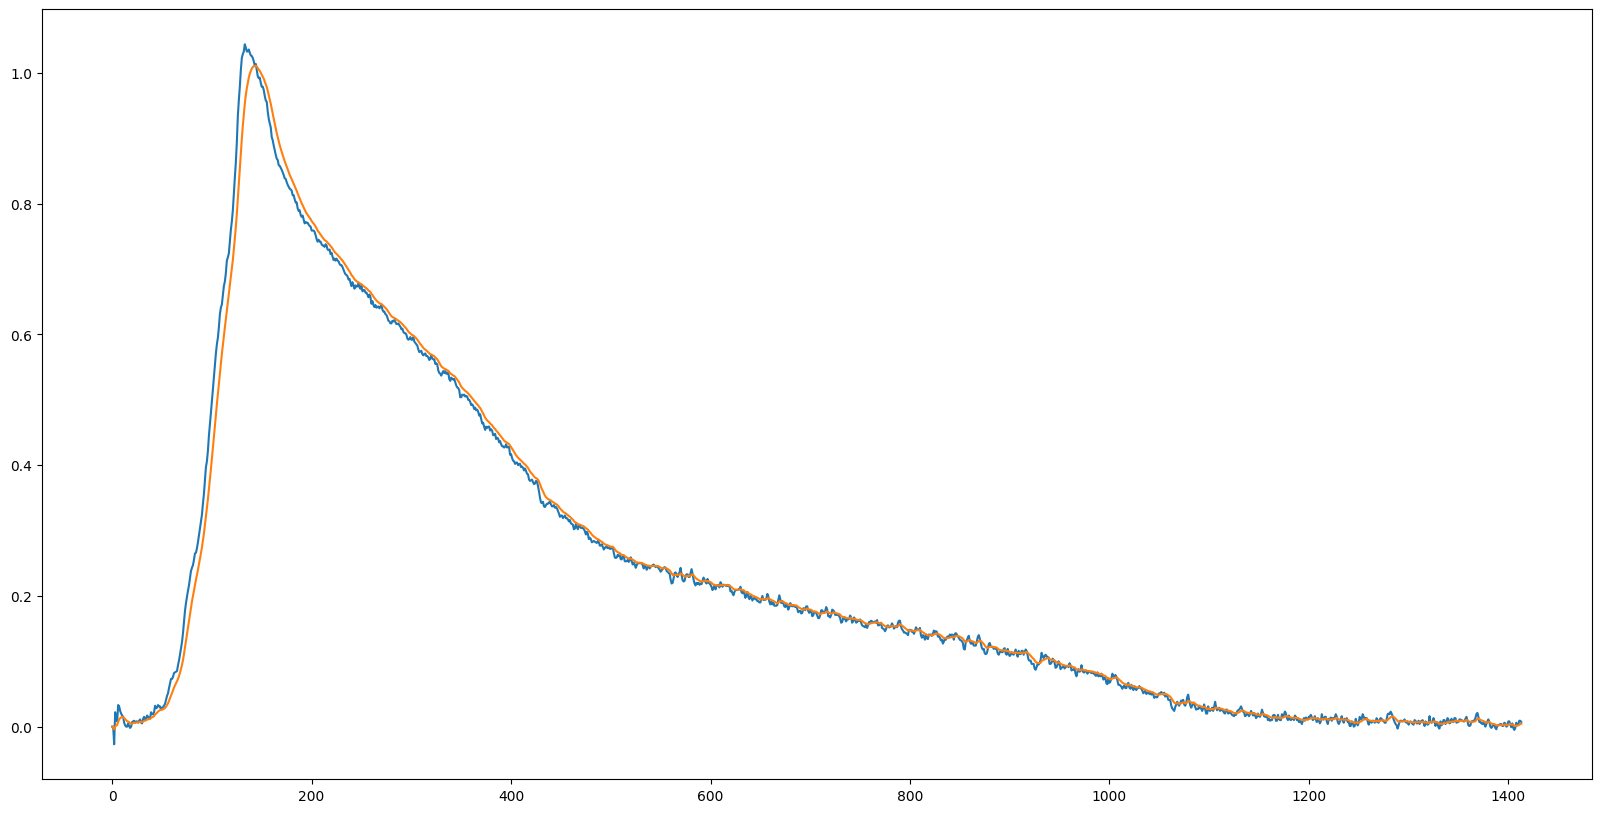

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['expo'])
plt.show()

# **Moyenne Mobile avec min_periods=1**

- Cette méthode calcule la moyenne mobile en incluant les valeurs disponibles même si la fenêtre n'est pas complètement remplie au début de la série,

In [24]:
# Appliquer une moyenne mobile sur une fenêtre de 3 points
df["Moyenne_Mobile"] = df['V11'].rolling(window=3, min_periods=1).mean()

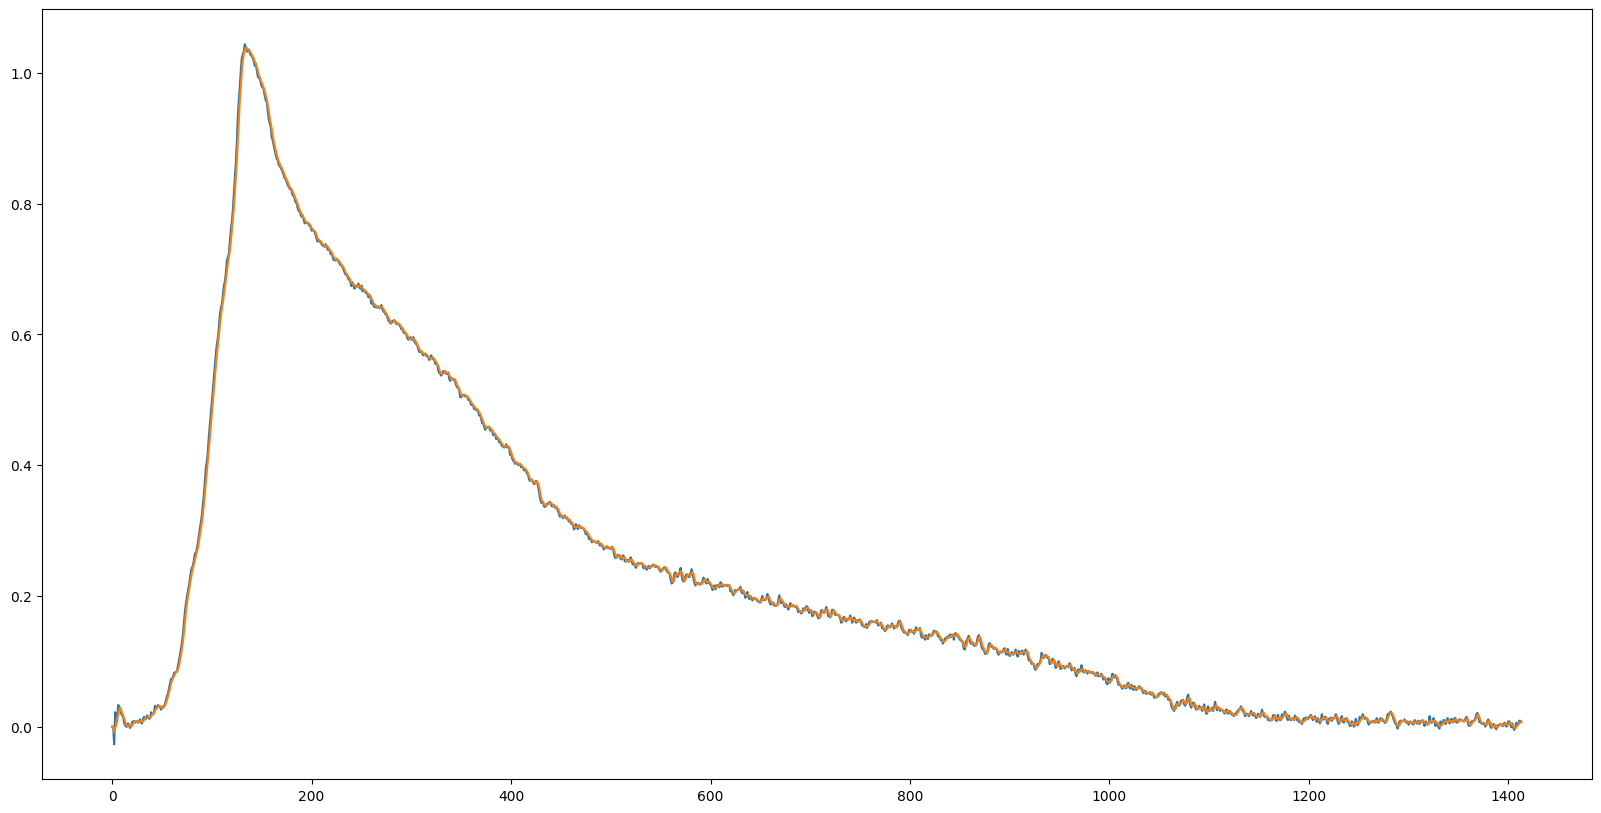

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df['V11'])
plt.plot(df['Moyenne_Mobile'])
plt.show()